<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_0_4_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.121051,80.805877,54.822437,12.194423,243.943788,233.916042,10.027746
1,0.0,1.0,53.969458,77.768230,72.649725,5.720259,220.107672,216.023866,4.083806
2,0.0,2.0,96.552418,62.934135,47.884166,-2.233629,215.137091,219.207079,-4.069988
3,0.0,3.0,28.682116,35.894641,56.367636,7.126404,138.070797,130.818818,7.251979
4,0.0,4.0,91.887272,86.461805,21.416727,-2.290680,207.475124,211.842861,-4.367736
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.732310,62.795026,23.398459,4.249559,182.175355,178.471249,3.704106
119996,999.0,116.0,23.073907,52.906080,74.445697,4.956136,165.381820,160.771350,4.610470
119997,999.0,117.0,87.549769,56.143653,70.263235,0.603659,224.560317,224.149028,0.411289
119998,999.0,118.0,36.027750,92.836617,59.547279,-5.019091,193.392555,199.311338,-5.918783


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    86.121051  80.805877  54.822437  ...  243.943788  233.916042  10.027746
      1.0    53.969458  77.768230  72.649725  ...  220.107672  216.023866   4.083806
      2.0    96.552418  62.934135  47.884166  ...  215.137091  219.207079  -4.069988
      3.0    28.682116  35.894641  56.367636  ...  138.070797  130.818818   7.251979
      4.0    91.887272  86.461805  21.416727  ...  207.475124  211.842861  -4.367736
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  81.732310  62.795026  23.398459  ...  182.175355  178.471249   3.704106
      116.0  23.073907  52.906080  74.445697  ...  165.381820  160.771350   4.610470
      117.0  87.549769  56.143653  70.263235  ...  224.560317  224.149028   0.411289
      118.0  36.027750  92.836617  59.547279  ...  193.392555  199.311338  -5.918783
      119.0  43.771500  99.013333  71.101857  ...  225.293723  224.779686   0.514037

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    86.121051  80.805877  54.822437  ...  243.943788  233.916042  10.027746
      1.0    53.969458  77.768230  72.649725  ...  220.107672  216.023866   4.083806
      2.0    96.552418  62.934135  47.884166  ...  215.137091  219.207079  -4.069988
      3.0    28.682116  35.894641  56.367636  ...  138.070797  130.818818   7.251979
      4.0    91.887272  86.461805  21.416727  ...  207.475124  211.842861  -4.367736
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  81.732310  62.795026  23.398459  ...  182.175355  178.471249   3.704106
      116.0  23.073907  52.906080  74.445697  ...  165.381820  160.771350   4.610470
      117.0  87.549769  56.143653  70.263235  ...  224.560317  224.149028   0.411289
      118.0  36.027750  92.836617  59.547279  ...  193.392555  199.311338  -5.918783
      119.0  43.771500  99.013333  71.101857  ...  225.293723  224.779686   0.514037

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.121051,80.805877,54.822437,12.194423,243.943788,233.916042,10.027746
1,0.0,1.0,53.969458,77.768230,72.649725,5.720259,220.107672,216.023866,4.083806
2,0.0,2.0,96.552418,62.934135,47.884166,-2.233629,215.137091,219.207079,-4.069988
3,0.0,3.0,28.682116,35.894641,56.367636,7.126404,138.070797,130.818818,7.251979
4,0.0,4.0,91.887272,86.461805,21.416727,-2.290680,207.475124,211.842861,-4.367736
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,81.732310,62.795026,23.398459,4.249559,182.175355,178.471249,3.704106
119996,999.0,116.0,23.073907,52.906080,74.445697,4.956136,165.381820,160.771350,4.610470
119997,999.0,117.0,87.549769,56.143653,70.263235,0.603659,224.560317,224.149028,0.411289
119998,999.0,118.0,36.027750,92.836617,59.547279,-5.019091,193.392555,199.311338,-5.918783


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    86.121051  80.805877  54.822437  ...  243.943788  233.916042  10.027746
      1.0    53.969458  77.768230  72.649725  ...  220.107672  216.023866   4.083806
      2.0    96.552418  62.934135  47.884166  ...  215.137091  219.207079  -4.069988
      3.0    28.682116  35.894641  56.367636  ...  138.070797  130.818818   7.251979
      4.0    91.887272  86.461805  21.416727  ...  207.475124  211.842861  -4.367736
...                ...        ...        ...  ...         ...         ...        ...
999.0 115.0  81.732310  62.795026  23.398459  ...  182.175355  178.471249   3.704106
      116.0  23.073907  52.906080  74.445697  ...  165.381820  160.771350   4.610470
      117.0  87.549769  56.143653  70.263235  ...  224.560317  224.149028   0.411289
      118.0  36.027750  92.836617  59.547279  ...  193.392555  199.311338  -5.918783
      119.0  43.771500  99.013333  71.101857  ...  225.293723  224.779686   0.514037

[120000 rows x 7 columns]

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

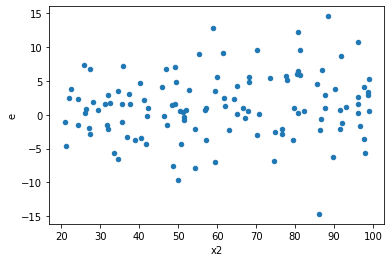

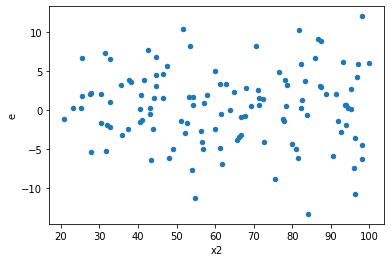

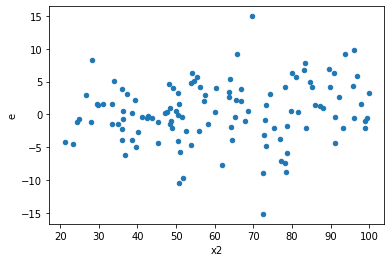

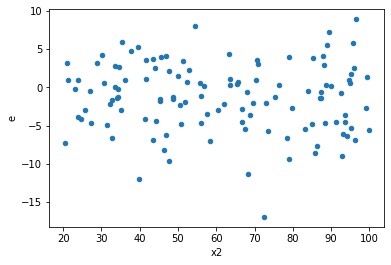

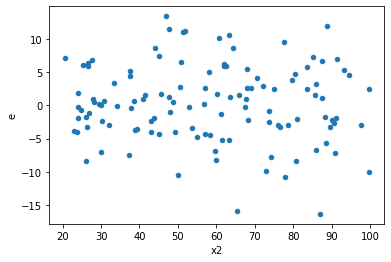

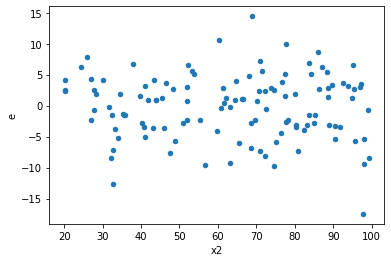

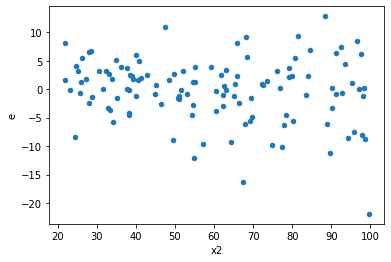

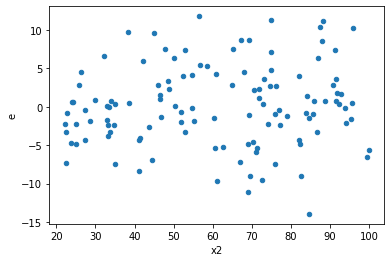

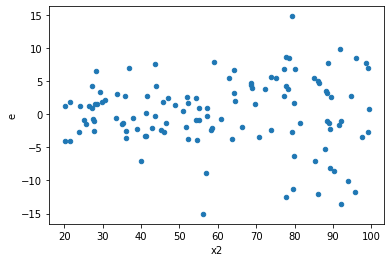

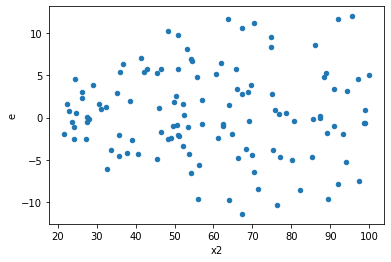

In [12]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,62.0,52.0,1166.6027151431313,1377.4117927807715,19.124634674477562,27.008074368250423,1.4077617467282753,0.19653058042290716,0.9017347097885464,Reject005=1 : Homoscedasticity
1.0,53.0,61.0,1058.2740057014205,1438.6568075906546,20.35142318656578,23.977613459844243,1.181150154139269,0.5376376253211945,0.7311811873394027,Reject005=1 : Homoscedasticity
6.0,46.0,68.0,819.2192268922164,2054.363195158392,18.20487170871592,30.66213724117003,1.696391189876918,0.05890918925957722,0.9705454053702114,Reject005=1 : Homoscedasticity
7.0,52.0,62.0,1329.9477654103405,1823.9476676506267,26.077407164908635,29.90078143689552,1.1502425882816913,0.6065779058424017,0.6967110470787992,Reject005=1 : Homoscedasticity
11.0,55.0,59.0,1287.7950687631285,2093.9405394514047,23.848056828946824,36.102423093989735,1.5157524021697906,0.12118689751661815,0.9394065512416909,Reject005=1 : Homoscedasticity
12.0,50.0,64.0,855.3782746977919,2193.795660427968,17.456699483628405,34.82215334012648,2.0036782677405243,0.011691869356548423,0.9941540653217258,Reject005=0 : Heteroscedasticity
13.0,48.0,66.0,854.5563680642126,2509.114668712962,18.18205038434495,38.601764134045574,2.1353894679745253,0.006592905457622811,0.9967035472711886,Reject005=0 : Heteroscedasticity
15.0,59.0,55.0,1246.570879037568,1181.1342432505942,21.492601362716687,21.872856356492484,1.0164162638431218,0.9487522488926934,0.5256238755536533,Reject005=1 : Homoscedasticity
16.0,69.0,45.0,1232.376563940029,1528.9610747547085,18.123184763823957,34.74911533533429,1.9023462875626698,0.015714801161439862,0.9921425994192801,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,62.0,52.0,1166.6027151431313,1377.4117927807715,19.124634674477562,27.008074368250423,1.4077617467282753,0.19653058042290716,Reject005=1 : Homoscedasticity
1.0,53.0,61.0,1058.2740057014205,1438.6568075906546,20.35142318656578,23.977613459844243,1.181150154139269,1.4623623746788055,Reject005=1 : Homoscedasticity
2.0,56.0,58.0,1262.751210698955,1095.5146260536626,22.959112921799182,19.219554843046712,0.8376458091475852,0.5046449892056328,Reject005=1 : Homoscedasticity
3.0,59.0,55.0,1153.6090777264883,988.5997074662367,19.889811684939453,18.307401990115494,0.9192870344772647,0.7544403811846516,Reject005=1 : Homoscedasticity
4.0,60.0,54.0,2139.762017444895,1714.643290093583,36.267152838049064,32.35176019044496,0.8903603277761031,0.6667431357567399,Reject005=1 : Homoscedasticity
5.0,55.0,59.0,1807.291260024206,1249.6979549193002,33.468356667114925,21.546516464125865,0.6445959738799504,0.09890697811207844,Reject005=1 : Homoscedasticity
6.0,46.0,68.0,819.2192268922164,2054.363195158392,18.20487170871592,30.66213724117003,1.696391189876918,0.05890918925957722,Reject005=1 : Homoscedasticity
7.0,52.0,62.0,1329.9477654103405,1823.9476676506267,26.077407164908635,29.90078143689552,1.1502425882816913,1.3934220941575983,Reject005=1 : Homoscedasticity
8.0,55.0,59.0,2194.3144231262527,797.0467563390736,40.63545228011579,13.742185454121959,0.33860675584227595,6.293478110653388e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      760
Reject005=0 : Heteroscedasticity    240
Name: Result_test, dtype: int64